### Import Libraries

In [1]:
# Import necessary libraries
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
import joblib
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


### 1.Load Data

In [7]:
from scipy.io import arff
import pandas as pd


data, meta = arff.loadarff(r'C:/Users/Mohamed El Sobkey/Downloads/AI system to analyze brain disturbances while driving/eeg+eye+state/EEG Eye State.arff')


df = pd.DataFrame(data)

df.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,b'0'
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,b'0'
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,b'0'
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,b'0'
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,b'0'


### 2.Check for Missing Values and Handle Them

In [9]:
# Check for missing values in the dataset
df.isnull().sum()

# Fill missing values with column means
df = df.fillna(df.mean())

# Convert 'eyeDetection' column from bytes to integers
df['eyeDetection'] = df['eyeDetection'].apply(lambda x: int(x.decode('utf-8')))

# Show the updated DataFrame
df.head()


,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0


### 3.Exploratory Data Analysis (EDA)

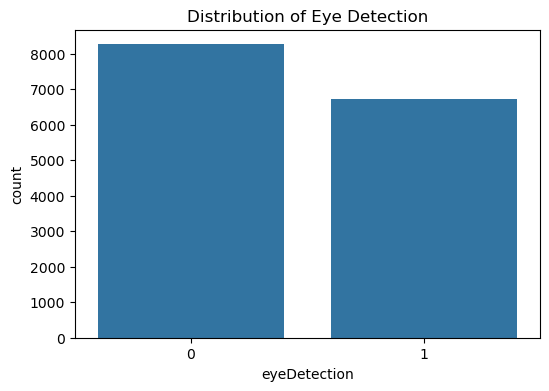

In [10]:
# Show basic statistics of the dataset
df.describe()

# Plot the distribution of the 'eyeDetection' column
plt.figure(figsize=(6, 4))
sns.countplot(x='eyeDetection', data=df)
plt.title('Distribution of Eye Detection')
plt.show()


### 4. Model Training: SVM

In [11]:
# Split data into features (X) and target (y)
X = df.drop(columns=['eyeDetection'])
y = df['eyeDetection']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM model
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Accuracy: 0.6281708945260347
              precision    recall  f1-score   support

           0       0.62      0.79      0.69      1586
           1       0.65      0.45      0.53      1410

    accuracy                           0.63      2996
   macro avg       0.63      0.62      0.61      2996
weighted avg       0.63      0.63      0.62      2996



### 5. Model Training: Random Forest

In [12]:
# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9212283044058746
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1586
           1       0.95      0.88      0.91      1410

    accuracy                           0.92      2996
   macro avg       0.92      0.92      0.92      2996
weighted avg       0.92      0.92      0.92      2996



### 6. Model Training: XGBoost

In [13]:
# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb}")
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.9295727636849133
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1586
           1       0.94      0.91      0.92      1410

    accuracy                           0.93      2996
   macro avg       0.93      0.93      0.93      2996
weighted avg       0.93      0.93      0.93      2996



### 7. Scaling Data and Model Evaluation

In [14]:
# Scale the data using Min-Max Scaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM model on scaled data
model.fit(X_train_scaled, y_train)
y_pred_scaled = model.predict(X_test_scaled)

# Evaluate the SVM model with scaled data
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Accuracy with Scaling: {accuracy_scaled}")
print(classification_report(y_test, y_pred_scaled))


Accuracy with Scaling: 0.5293724966622163
              precision    recall  f1-score   support

           0       0.53      1.00      0.69      1586
           1       0.00      0.00      0.00      1410

    accuracy                           0.53      2996
   macro avg       0.26      0.50      0.35      2996
weighted avg       0.28      0.53      0.37      2996



C:\Users\Mohamed El Sobkey\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mohamed El Sobkey\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mohamed El Sobkey\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### 8. Adding Extra Features to the Dataset

In [15]:
# Add additional features: Mean of each row (example)
X_train_mean = X_train.mean(axis=1).values.reshape(-1, 1)
X_test_mean = X_test.mean(axis=1).values.reshape(-1, 1)

# Concatenate these features with the original data
X_train_extended = np.hstack((X_train, X_train_mean))
X_test_extended = np.hstack((X_test, X_test_mean))

# Train the model with extended features
model.fit(X_train_extended, y_train)
y_pred_extended = model.predict(X_test_extended)

# Evaluate the model with extended features
accuracy_extended = accuracy_score(y_test, y_pred_extended)
print(f"Accuracy with Extended Features: {accuracy_extended}")
print(classification_report(y_test, y_pred_extended))


Accuracy with Extended Features: 0.6341789052069426
              precision    recall  f1-score   support

           0       0.62      0.81      0.70      1586
           1       0.67      0.44      0.53      1410

    accuracy                           0.63      2996
   macro avg       0.64      0.62      0.62      2996
weighted avg       0.64      0.63      0.62      2996



### 9. Cross-Validation

In [16]:
# Perform 10-fold cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=10)

# Print the cross-validation results
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean()} +/- {cv_scores.std()}")


Cross-validation scores: [0.55629691 0.55629691 0.55629691 0.55713094 0.55676127 0.55676127
 0.55592654 0.55676127 0.55676127 0.55676127]
Mean CV score: 0.5565754572884193 +/- 0.00033690360594693103


### 10. Hyperparameter Tuning with GridSearchCV

In [17]:
# Define parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)

# Scale the data before fitting GridSearchCV
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Display best parameters found by GridSearchCV
print(f"Best parameters: {grid_search.best_params_}")

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)

# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy with Best Model: {accuracy_best}")
print(classification_report(y_test, y_pred_best))


Best parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Accuracy with Best Model: 0.5323765020026703
              precision    recall  f1-score   support

           0       0.53      1.00      0.69      1586
           1       0.85      0.01      0.02      1410

    accuracy                           0.53      2996
   macro avg       0.69      0.50      0.35      2996
weighted avg       0.68      0.53      0.37      2996



#### 11. Model Training: MLP

In [18]:
# Initialize MLP Classifier (Multi-layer Perceptron)
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Train the MLP model
mlp_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_mlp = mlp_model.predict(X_test_scaled)

# Evaluate the MLP model
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"MLP Accuracy: {accuracy_mlp}")
print(classification_report(y_test, y_pred_mlp))


MLP Accuracy: 0.5397196261682243
              precision    recall  f1-score   support

           0       0.55      0.69      0.61      1586
           1       0.52      0.37      0.43      1410

    accuracy                           0.54      2996
   macro avg       0.53      0.53      0.52      2996
weighted avg       0.53      0.54      0.53      2996



### 12. Model Training: LSTM (Deep Learning Model)

In [19]:
# Reshape the data to fit LSTM input
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Convert labels to categorical (for classification)
y_train_lstm = to_categorical(y_train)
y_test_lstm = to_categorical(y_test)

# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dense(2, activation='softmax'))

# Compile and train the LSTM model
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train_lstm, y_train_lstm, epochs=20, batch_size=64, verbose=2)

# Make predictions with LSTM
y_pred_lstm = np.argmax(lstm_model.predict(X_test_lstm), axis=1)

# Evaluate LSTM model
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
print(f"LSTM Accuracy: {accuracy_lstm}")
print(classification_report(y_test, y_pred_lstm))


C:\Users\Mohamed El Sobkey\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
188/188 - 4s - 24ms/step - accuracy: 0.5567 - loss: 0.6878
Epoch 2/20
188/188 - 1s - 6ms/step - accuracy: 0.5567 - loss: 0.6868
Epoch 3/20
188/188 - 1s - 6ms/step - accuracy: 0.5567 - loss: 0.6867
Epoch 4/20
188/188 - 1s - 5ms/step - accuracy: 0.5567 - loss: 0.6868
Epoch 5/20
188/188 - 1s - 5ms/step - accuracy: 0.5567 - loss: 0.6866
Epoch 6/20
188/188 - 1s - 6ms/step - accuracy: 0.5567 - loss: 0.6866
Epoch 7/20
188/188 - 1s - 6ms/step - accuracy: 0.5567 - loss: 0.6865
Epoch 8/20
188/188 - 1s - 5ms/step - accuracy: 0.5567 - loss: 0.6866
Epoch 9/20
188/188 - 1s - 4ms/step - accuracy: 0.5567 - loss: 0.6866
Epoch 10/20
188/188 - 1s - 4ms/step - accuracy: 0.5567 - loss: 0.6866
Epoch 11/20
188/188 - 1s - 4ms/step - accuracy: 0.5567 - loss: 0.6864
Epoch 12/20
188/188 - 1s - 4ms/step - accuracy: 0.5567 - loss: 0.6862
Epoch 13/20
188/188 - 1s - 4ms/step - accuracy: 0.5567 - loss: 0.6862
Epoch 14/20
188/188 - 1s - 6ms/step - accuracy: 0.5567 - loss: 0.6861
Epoch 15/20
188/188 - 1s - 6

### 13. Save the Best Model

In [20]:
# Save the best model to disk using joblib
joblib.dump(best_model, 'C:/Users/Mohamed El Sobkey/Downloads/AI system to analyze brain disturbances while driving/eeg+eye+state/EEG Eye State.arff')


['C:/Users/Mohamed El Sobkey/Downloads/AI system to analyze brain disturbances while driving/eeg+eye+state/EEG Eye State.arff']

### 14. Confusion Matrix

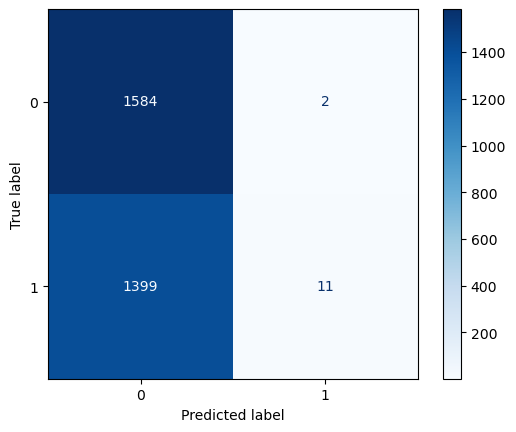

In [21]:
# Generate confusion matrix for the best model
cm = confusion_matrix(y_test, y_pred_best)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.show()


In [24]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score


models = [xgb_model, rf_model, SVC]  
model_names = ["XGBoost", "Random Forest", "SVM"]

best_model = None
best_f1_score = 0
best_model_name = ""

for model, name in zip(models, model_names):
   
    y_pred = model.predict(X_test)
    
  
    if hasattr(model, "predict_proba"):
        auc_roc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    else:
        auc_roc = roc_auc_score(y_test, y_pred)  
    
 
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)


    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"F1-score: {f1}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"AUC-ROC: {auc_roc}")
    print("-" * 50)

  
    if f1 > best_f1_score:
        best_f1_score = f1
        best_model = model
        best_model_name = name


print(f"The best model is: {best_model_name}")


Model: XGBoost
Accuracy: 0.9295727636849133
F1-score: 0.9236889692585896
Precision: 0.9424354243542435
Recall: 0.9056737588652483
AUC-ROC: 0.983041327931457
--------------------------------------------------
Model: Random Forest
Accuracy: 0.9212283044058746
F1-score: 0.9131714495952906
Precision: 0.9487767584097859
Recall: 0.8801418439716312
AUC-ROC: 0.9810290395571177
--------------------------------------------------


TypeError: BaseSVC.predict() missing 1 required positional argument: 'X'

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


svm_model = SVC(probability=True, random_state=42)  # probability=True يسمح باستخدام predict_proba
svm_model.fit(X_train, y_train)


xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)


models = [xgb_model, rf_model, svm_model]
model_names = ["XGBoost", "Random Forest", "SVM"]

best_model = None
best_f1_score = 0
best_model_name = ""


for model, name in zip(models, model_names):
    y_pred = model.predict(X_test) 
    
    
    if hasattr(model, "predict_proba"):
        auc_roc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    else:
        auc_roc = roc_auc_score(y_test, y_pred)  
    
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"F1-score: {f1}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"AUC-ROC: {auc_roc}")
    print("-" * 50)

   
    if f1 > best_f1_score:
        best_f1_score = f1
        best_model = model
        best_model_name = name


print(f"The best model is: {best_model_name}")


Model: XGBoost
Accuracy: 0.9295727636849133
F1-score: 0.9236889692585896
Precision: 0.9424354243542435
Recall: 0.9056737588652483
AUC-ROC: 0.983041327931457
--------------------------------------------------
Model: Random Forest
Accuracy: 0.9212283044058746
F1-score: 0.9131714495952906
Precision: 0.9487767584097859
Recall: 0.8801418439716312
AUC-ROC: 0.9810290395571177
--------------------------------------------------
Model: SVM
Accuracy: 0.5293724966622163
F1-score: 0.0
Precision: 0.0
Recall: 0.0
AUC-ROC: 0.595952170141218
--------------------------------------------------
The best model is: XGBoost


C:\Users\Mohamed El Sobkey\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [26]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb


param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}


xgb_model = xgb.XGBClassifier(objective='binary:logistic')


grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


print("Best Parameters:", grid_search.best_params_)


best_xgb_model = grid_search.best_estimator_


y_pred = best_xgb_model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("F1-Score: ", f1_score(y_test, y_pred))


Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Accuracy:  0.934913217623498
F1-Score:  0.9295774647887324


In [27]:
best_xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [28]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_xgb_model.predict_proba(X_test)[:, 1])

print(f"Accuracy: {accuracy}")
print(f"F1-score: {f1}")
print(f"AUC-ROC: {roc_auc}")


Accuracy: 0.934913217623498
F1-score: 0.9295774647887324
AUC-ROC: 0.9868405283822095


In [29]:
import joblib
joblib.dump(best_xgb_model, 'xgboost_model.pkl')


['xgboost_model.pkl']